In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import gauss
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

NUM_SOURCE = 6
X1 = 21
X2 = 21
V = 441
N = 240

### Question 1.1

In [35]:
def construct(AV, IV, duration):
    """ Construct matrix TC """
    
    tc = np.array([])
    iv_count = IV
    
    # onsets arrival vector
    tc = np.zeros(AV)
    
    while len(tc) < N:
        
        # duration of ones
        
        for i in range(duration):
            if len(tc) >= N:
                break
            tc = np.append(tc, 1)

        # increment vector
        while (len(tc) < iv_count) & (len(tc) < N):
            tc = np.append(tc, 0)
        iv_count += IV
        
        # onsets arrival vector
        for i in range(AV):
            if len(tc) >= N:
                break
            tc = np.append(tc, 0)
        
    # Standardise
    tc = tc - np.mean(tc)
    tc = tc / np.std(tc)
    
    return tc

In [36]:
#(AV) = [0,20,0,0,0,0], (IV) = [30,45,60,40,40,40], duration of ones = [15,20,25,15,20,25].
tc1 = construct(0, 30, 15)
tc2 = construct(20, 45, 20)
tc3 = construct(0, 60, 25)
tc4 = construct(0, 40, 15)
tc5 = construct(0, 40, 20)
tc6 = construct(0, 40, 25)
TC = [tc1, tc2, tc3, tc4, tc5, tc6]

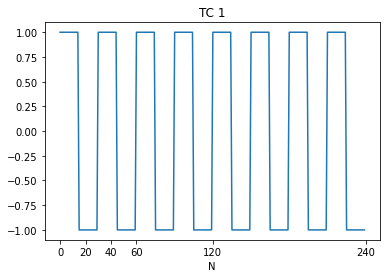

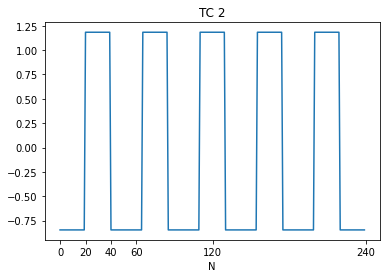

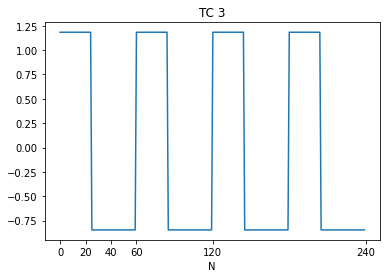

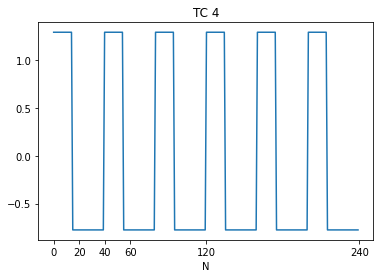

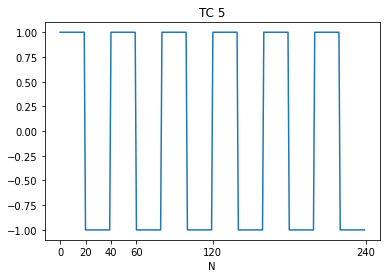

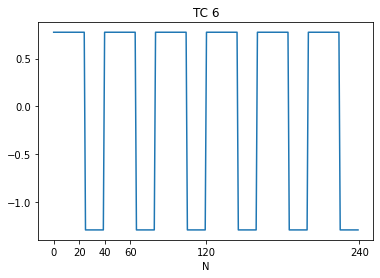

In [40]:
count = 0
for tc in TC:
    count += 1
    plt.plot(tc)
    plt.title("TC " + str(count))
    plt.xlabel("N")
    plt.xticks([0, 20, 40, 60, 120, 240])
    plt.savefig('plots/TC_'+str(count)) #save plots
    plt.show()

### Question 1.2¶

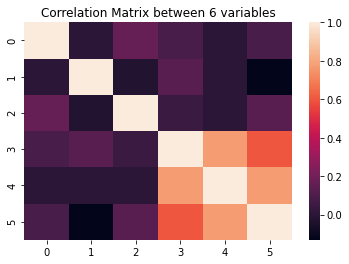

In [48]:
df = pd.DataFrame(TC)
tc_df = df.T
ax = sns.heatmap(tc_df.corr())
plt.title("Correlation Matrix between 6 variables");
plt.savefig('plots/CM_TC')

### Question 1.3

In [6]:
def one_slice(a, b, c, d):
    
    tmp_sm = np.zeros(V).reshape((X1,X2))
    
    for row in range(a-1, b):
        for col in range(c-1, d):
            tmp_sm[row][col] = 1.0
            
    return tmp_sm

In [7]:
#i) 02:06,02:06, ii) 02:06,15:19, iii) 08:13,02:06, iv) 08:13,15:19, v) 15:19,02:06, vi) 15:19,15:19
tmp1 = one_slice(2, 6, 2, 6)
tmp2 = one_slice(2, 6, 15, 19)
tmp3 = one_slice(8, 13, 2, 6)
tmp4 = one_slice(8, 13, 15, 19)
tmp5 = one_slice(15, 19, 2, 6)
tmp6 = one_slice(15, 19, 15, 19)

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

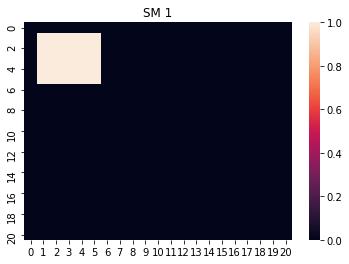

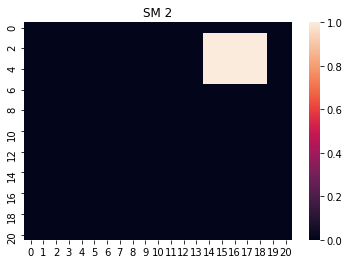

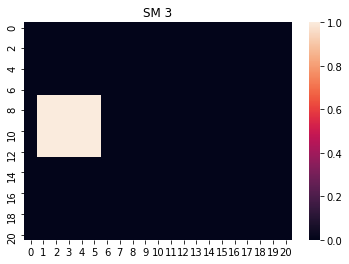

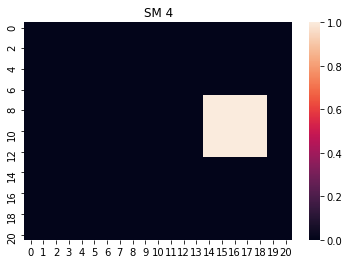

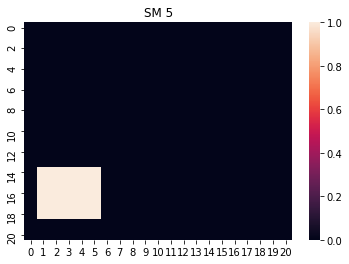

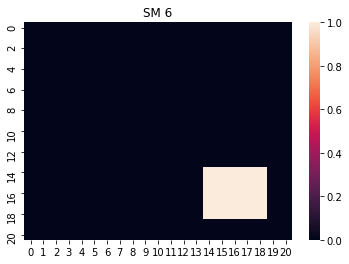

In [47]:
count = 0
for tmp in tmpSM:
    tmp_df = pd.DataFrame(tmp)
    count += 1
    ax = sns.heatmap(tmp_df)
    plt.title("SM " + str(count))
    plt.savefig('plots/SM_'+str(count))
    plt.show()

In [9]:
SM = tmpSM.reshape((NUM_SOURCE, V))

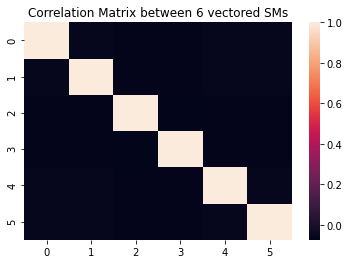

In [49]:
sm_df = pd.DataFrame(SM)
sm_df = sm_df.T
sns.heatmap(sm_df.corr())
plt.title("Correlation Matrix between 6 vectored SMs")
plt.savefig('plots/CM_SM');

### Question 1.4

In [11]:
temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(N * NUM_SOURCE)])
temp_noise = temp_noise.reshape((N,NUM_SOURCE))

spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(NUM_SOURCE * V)])
spatial_noise = spatial_noise.reshape((NUM_SOURCE,V))

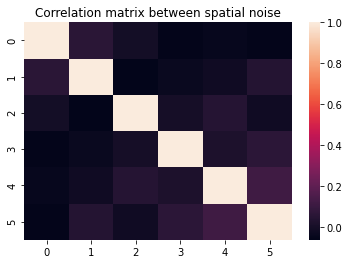

In [51]:
snoise_df = pd.DataFrame(spatial_noise)
snoise_df = snoise_df.T
sns.heatmap(snoise_df.corr())
plt.title("Correlation matrix between spatial noise");
plt.savefig('plots/CM_SpatialNoise');

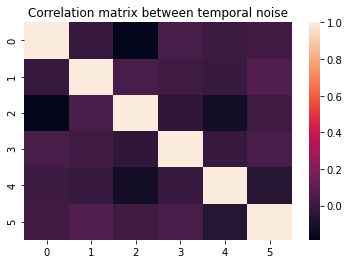

In [52]:
tnoise_df = pd.DataFrame(temp_noise)
sns.heatmap(tnoise_df.corr())
plt.title("Correlation matrix between temporal noise");
plt.savefig('plots/CM_TemporalNoise');

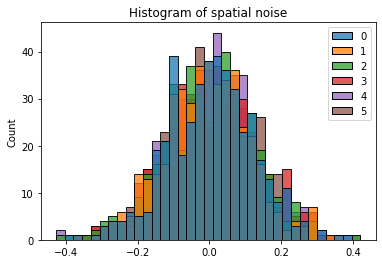

In [53]:
sns.histplot(data=snoise_df)
plt.title("Histogram of spatial noise");
plt.savefig('plots/Histogram_SpatialNoise');

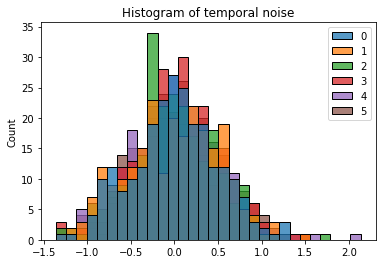

In [55]:
sns.histplot(data=tnoise_df)
plt.title("Histogram of temporal noise");
plt.savefig('plots/Histogram_TemporalNoise');

In [16]:
TtTs = np.dot(temp_noise, spatial_noise)

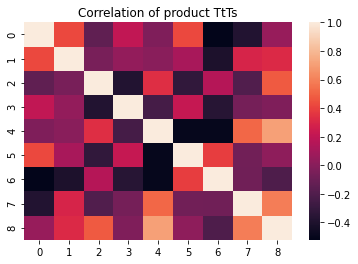

In [56]:
ttts_df = pd.DataFrame(TtTs)
mini_df = ttts_df[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
sns.heatmap(mini_df.corr())
plt.title("Correlation of product TtTs");
plt.savefig('plots/CM_TtTs');

### Question 1.5

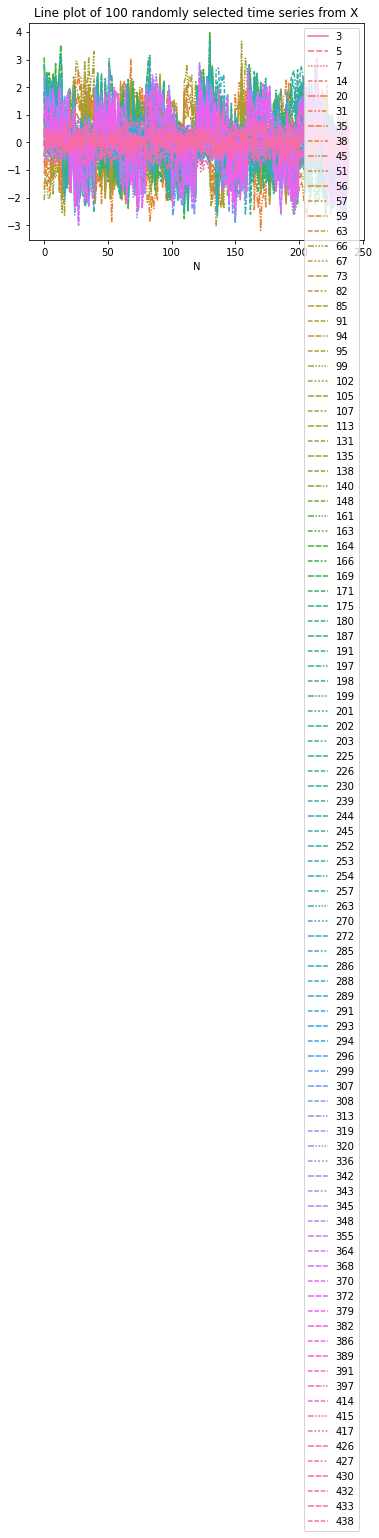

In [59]:
TC = np.transpose(TC)
X = np.dot((TC + temp_noise), (SM + spatial_noise))
X_df = pd.DataFrame(X)
randomly_selected = random.sample(list(range(0,V)), 100)
sample = X_df[randomly_selected]
sns.lineplot(data = sample)
plt.title("Line plot of 100 randomly selected time series from X");
plt.xlabel("N")
plt.savefig('plots/Lineplot_randomX');

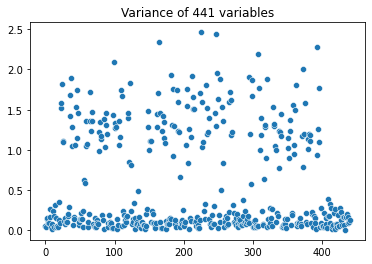

In [60]:
var = np.var(X_df)
sns.scatterplot(data = var)
plt.title("Variance of 441 variables");
plt.savefig('plots/Variance_X');

In [20]:
# Standardise X
X = X - np.mean(X)
X = X / np.std(X)

### Question 2.1

In [21]:
DTD = np.dot(np.transpose(TC), TC)
DTD_inv = np.linalg.inv(DTD)
DTX = np.dot(np.transpose(TC), X)
A_lsr = np.dot(DTD_inv, DTX)
D_lsr = np.dot(X, np.transpose(A_lsr))

In [22]:
Alsr = []
for row in A_lsr:
    Alsr.append(row.reshape((X1, X2)))

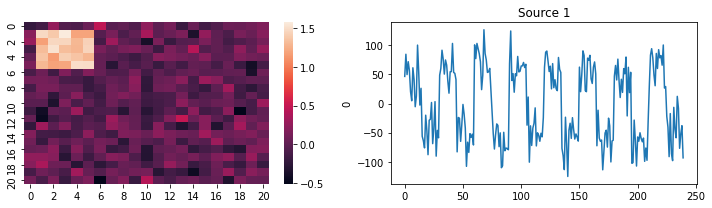

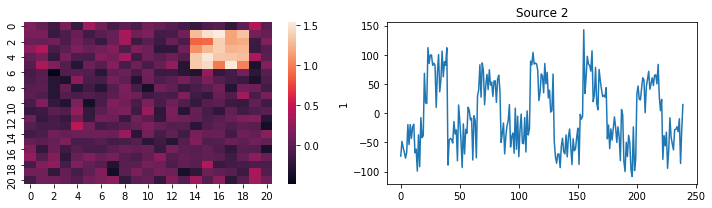

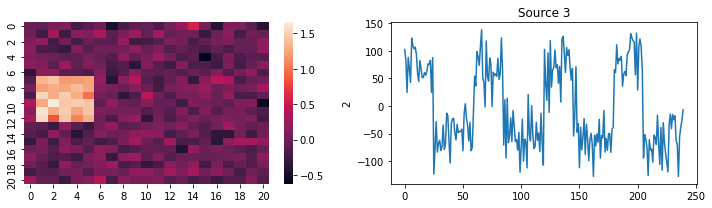

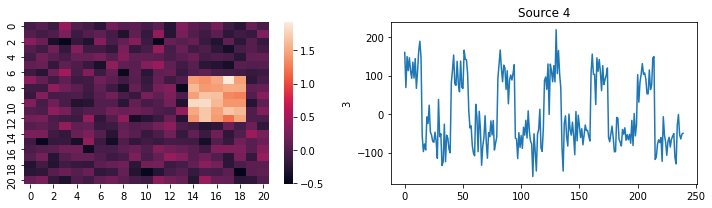

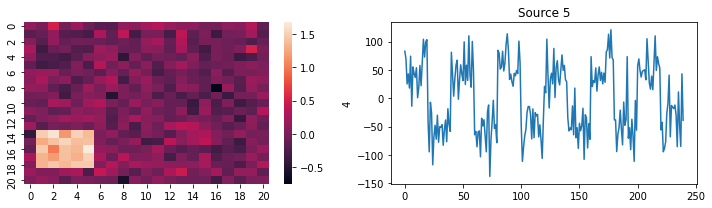

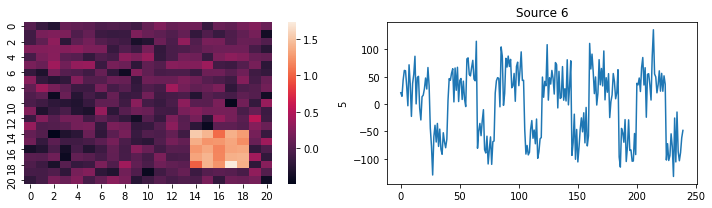

In [71]:
dlsr_df = pd.DataFrame(D_lsr)
for col in range(0, NUM_SOURCE):
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    sns.heatmap(data = Alsr[col], ax = axes[0])
    sns.lineplot(data=dlsr_df[col], ax = axes[1])
    plt.title("Source " + str(col+1))
    plt.tight_layout()
    plt.savefig("plots/LSR_source"+str(col+1))
    plt.show()

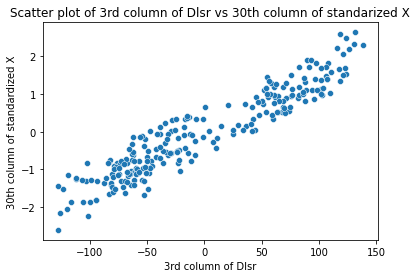

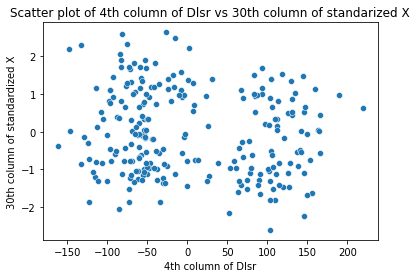

In [75]:
sns.scatterplot(dlsr_df[2], X_df[9*X1 + 2])
plt.xlabel("3rd column of Dlsr")
plt.ylabel("30th column of standardized X")
plt.title("Scatter plot of 3rd column of Dlsr vs 30th column of standarized X")
plt.savefig("plots/scatterplot_3rdDlsr_vs_X")
plt.show()

sns.scatterplot(dlsr_df[3], X_df[9*X1 + 2])
plt.xlabel("4th column of Dlsr")
plt.ylabel("30th column of standardized X")
plt.title("Scatter plot of 4th column of Dlsr vs 30th column of standarized X")
plt.savefig("plots/scatterplot_4thDlsr_vs_X")
plt.show()

### Question 2.2

In [25]:
lamda_hat = 0.5 * V
I = np.identity(6)
Z = DTD + np.dot(lamda_hat, I)
Z_inv = np.linalg.inv(Z)
A_rr = np.dot(Z_inv, DTX)
D_rr = np.dot(X, np.transpose(A_rr))

In [26]:
from scipy.stats import pearsonr

ctlsr = []
ctrr = []
for i in range(NUM_SOURCE):
        corr, _ = pearsonr(TC[i], D_lsr[i])
        ctlsr.append(corr)
        
        corr2, _ = pearsonr(TC[i], D_rr[i])
        ctrr.append(corr2)
        
print("Sum of CtRR greater than Sum of CtLSR: ", sum(ctrr) > sum(ctlsr))

Sum of CtRR greater than Sum of CtLSR:  True


In [27]:
lmda_alt = 1000 * V
Z_alt = DTD + np.dot(lmda_alt, I)
Z_inv_alt = np.linalg.inv(Z_alt)
Arr_alt = np.dot(Z_inv_alt, DTX)

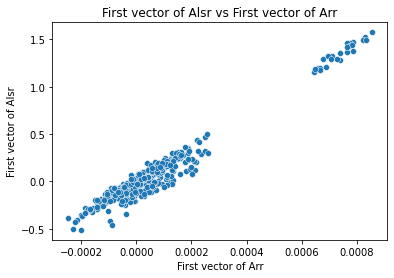

In [77]:
Arr_alt_df = pd.DataFrame(Arr_alt)
Arr_alt_df = Arr_alt_df.T

alsr_df = pd.DataFrame(A_lsr)
alsr_df = alsr_df.T

sns.scatterplot(Arr_alt_df[0], alsr_df[0])
plt.xlabel("First vector of Arr")
plt.ylabel("First vector of Alsr")
plt.title("First vector of Alsr vs First vector of Arr")
plt.savefig("plots/arr_vs_alsr")

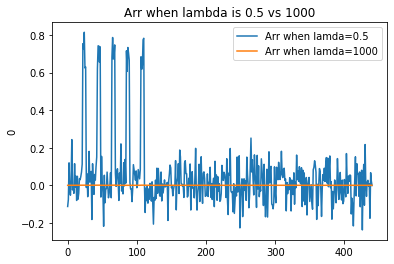

In [78]:
Arr_df = pd.DataFrame(np.transpose(A_rr))
sns.lineplot(data=Arr_df[0], label='Arr when lamda=0.5')
sns.lineplot(data=Arr_alt_df[0], label='Arr when lamda=1000')
plt.title("Arr when lambda is 0.5 vs 1000")
plt.savefig("plots/arr_lambda")

In [30]:
Alsr_df = pd.DataFrame(A_lsr)
Drr_df = pd.DataFrame(D_rr)

In [79]:
tc_df = pd.DataFrame(TC)
X_df.to_csv("datafile/X.csv")
sm_df.to_csv("datafile/SM.csv")
tc_df.to_csv("datafile/TC.csv")
Arr_df.to_csv("datafile/Arr.csv")
Drr_df.to_csv("datafile/Drr.csv")

In [80]:
def new_X(i):
    
    temp_noise = np.array([gauss(0.0, math.sqrt(0.25)) for i in range(N * NUM_SOURCE)])
    temp_noise = temp_noise.reshape((N,NUM_SOURCE))

    spatial_noise = np.array([gauss(0.0, math.sqrt(0.015)) for i in range(NUM_SOURCE * V)])
    spatial_noise = spatial_noise.reshape((NUM_SOURCE,V))

    X = np.dot((TC + temp_noise), (SM + spatial_noise))
    X_df = pd.DataFrame(X)
    
    X_df.to_csv("datafile/X" + str(i) + ".csv")
    return

for i in range(10):
    new_X(i+1)

### Question 2.3 onwards in another notebook¶